In [1]:
import argparse
import numpy as np
import pandas as pd
import pickle
import copy
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import os
import random
from tqdm import tqdm
import torch.nn.functional as F
from collections import Counter
from itertools import islice
import itertools

In [2]:
def intToRoman(num):
 
     # Storing roman values of digits from 0-9 
     # when placed at different places
     m = [ "", "m", "mm", "mmm" ]
     c = [ "", "c", "cc", "ccc", "cd", "d", 
           "dc", "dcc", "dccc", "cm "]
     x = [ "", "x", "xx", "xxx", "xl", "l", 
           "lx", "lxx", "lxxx", "xc" ]
     i = [ "", "i", "ii", "iii", "iv", "v", 
           "vi", "vii", "viii", "ix"]
          
     # Converting to roman
     thousands = m[num // 1000]
     hundereds = c[(num % 1000) // 100]
     tens =  x[(num % 100) // 10]
     ones = i[num % 10]
          
     ans = (thousands + hundereds +
                 tens + ones)
          
     return ans;

In [3]:
with open('comm_rounds_fashion_lfa_3', 'rb') as f:
    rounds = pickle.load(f)

In [4]:
marker = itertools.cycle(('o', 'v', '^', 's', '8', '<', '>','p'))
#marker = itertools.cycle(('o', 'v', '^', '>','p'))
from matplotlib.lines import Line2D

In [5]:
with open('accuracy_fashion_lfa_3', 'rb') as f:
    acc_3 = pickle.load(f)

In [6]:
with open('asr_lfa_3', 'rb') as f:
    asr_3 = pickle.load(f)

In [7]:
with open('mcr_lfa_3', 'rb') as f:
    mcr_3 = pickle.load(f)

In [8]:
with open('t_mcr_lfa_3', 'rb') as f:
    t_mcr_3 = pickle.load(f)

In [9]:
with open('accuracy_fashion_lfa_6', 'rb') as f:
    acc_6 = pickle.load(f)
with open('asr_lfa_6', 'rb') as f:
    asr_6 = pickle.load(f)
with open('mcr_lfa_6', 'rb') as f:
    mcr_6 = pickle.load(f)
with open('t_mcr_lfa_6', 'rb') as f:
    t_mcr_6 = pickle.load(f)
with open('accuracy_fashion_lfa_9', 'rb') as f:
    acc_9 = pickle.load(f)
with open('asr_lfa_9', 'rb') as f:
    asr_9 = pickle.load(f)
with open('mcr_lfa_9', 'rb') as f:
    mcr_9 = pickle.load(f)
with open('t_mcr_lfa_9', 'rb') as f:
    t_mcr_9 = pickle.load(f)
with open('accuracy_fashion_lfa_12', 'rb') as f:
    acc_12 = pickle.load(f)
with open('asr_lfa_12', 'rb') as f:
    asr_12 = pickle.load(f)
with open('mcr_lfa_12', 'rb') as f:
    mcr_12 = pickle.load(f)
with open('t_mcr_lfa_12', 'rb') as f:
    t_mcr_12 = pickle.load(f)
with open('accuracy_fashion_lfa_15', 'rb') as f:
    acc_15 = pickle.load(f)
with open('asr_lfa_15', 'rb') as f:
    asr_15 = pickle.load(f)
with open('mcr_lfa_15', 'rb') as f:
    mcr_15 = pickle.load(f)
with open('t_mcr_lfa_15', 'rb') as f:
    t_mcr_15 = pickle.load(f)
with open('accuracy_fashion_lfa_18', 'rb') as f:
    acc_18 = pickle.load(f)
with open('asr_lfa_18', 'rb') as f:
    asr_18 = pickle.load(f)
with open('mcr_lfa_18', 'rb') as f:
    mcr_18 = pickle.load(f)
with open('t_mcr_lfa_18', 'rb') as f:
    t_mcr_18 = pickle.load(f)
with open('accuracy_fashion_lfa_21', 'rb') as f:
    acc_21 = pickle.load(f)
with open('asr_lfa_21', 'rb') as f:
    asr_21 = pickle.load(f)
with open('mcr_lfa_21', 'rb') as f:
    mcr_21 = pickle.load(f)
with open('t_mcr_lfa_21', 'rb') as f:
    t_mcr_21 = pickle.load(f)
with open('accuracy_mnist_lfa_24', 'rb') as f:
    acc_24 = pickle.load(f)
with open('asr_lfa_24', 'rb') as f:
    asr_24 = pickle.load(f)
with open('mcr_lfa_24', 'rb') as f:
    mcr_24 = pickle.load(f)
with open('t_mcr_lfa_24', 'rb') as f:
    t_mcr_24 = pickle.load(f)
with open('accuracy_fashion_lfa_27', 'rb') as f:
    acc_27 = pickle.load(f)
with open('asr_lfa_27', 'rb') as f:
    asr_27 = pickle.load(f)
with open('mcr_lfa_27', 'rb') as f:
    mcr_27 = pickle.load(f)
with open('t_mcr_lfa_27', 'rb') as f:
    t_mcr_27 = pickle.load(f)

In [10]:
with open('accuracy_fashion_lfa_0', 'rb') as f:
    acc_0 = pickle.load(f)
with open('asr_lfa_0', 'rb') as f:
    asr_0 = pickle.load(f)
with open('mcr_lfa_0', 'rb') as f:
    mcr_0 = pickle.load(f)
with open('t_mcr_lfa_0', 'rb') as f:
    t_mcr_0 = pickle.load(f)

# Plot accuracy all % attackers

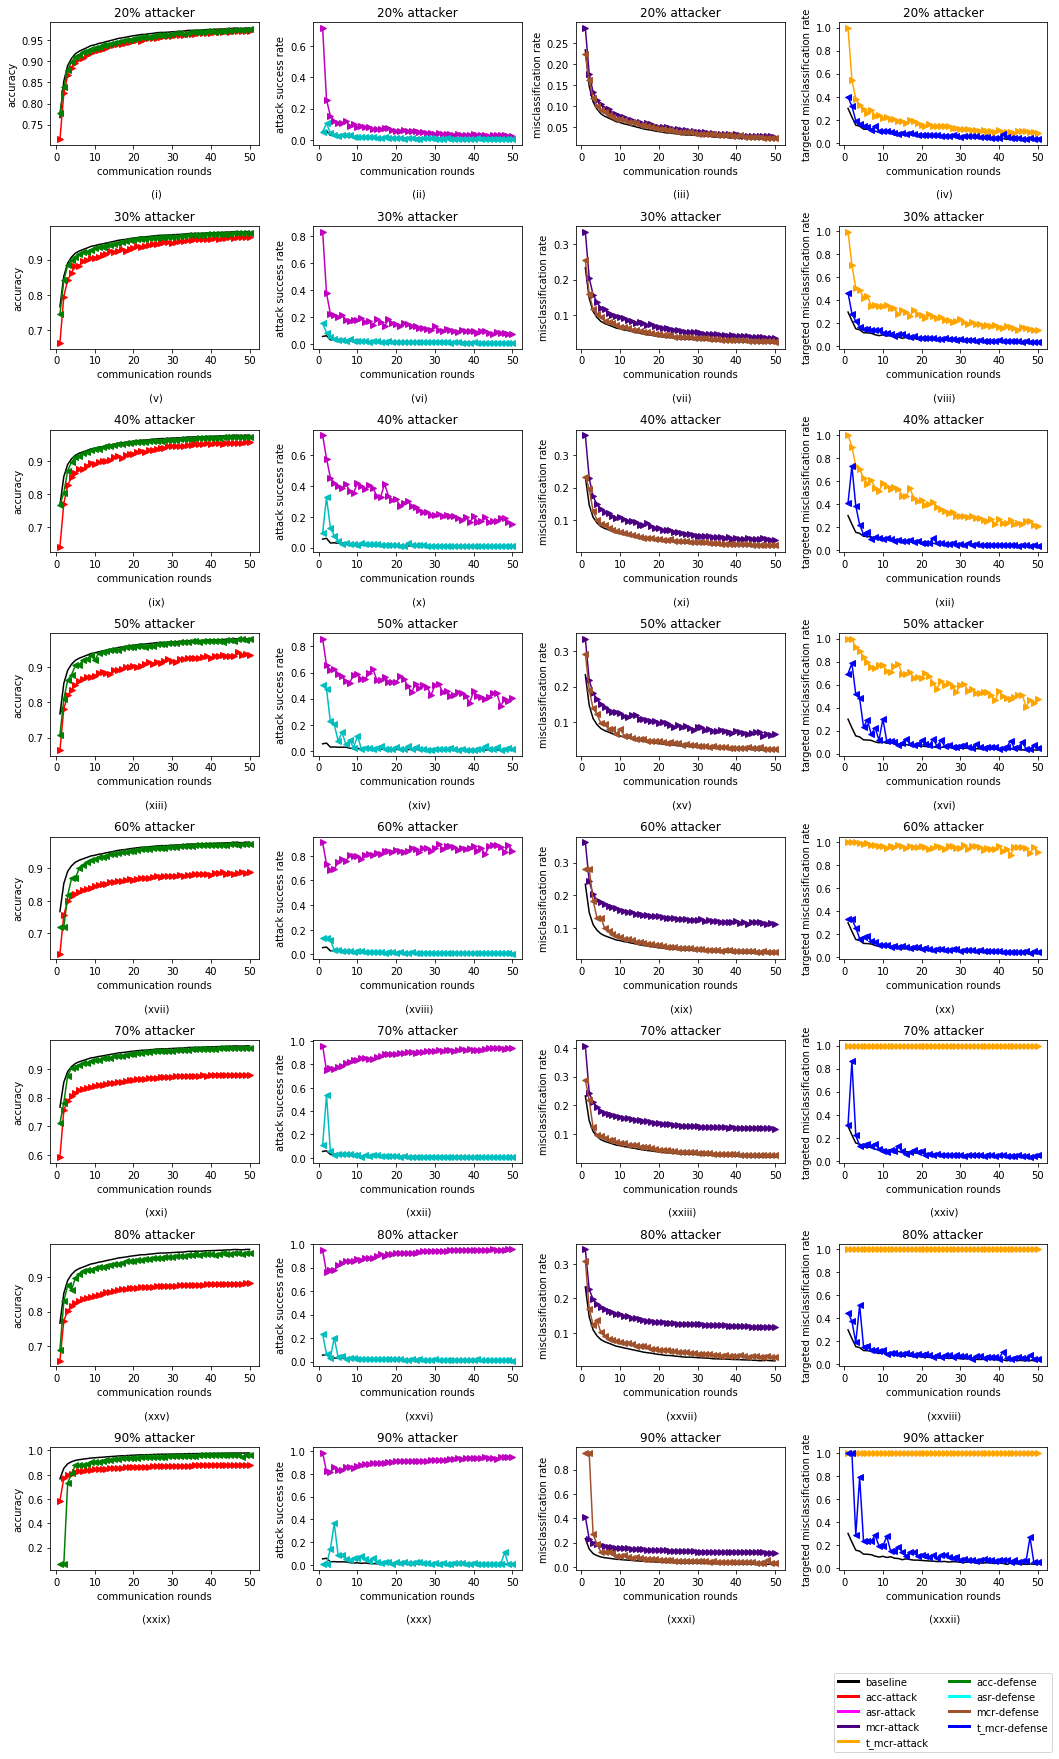

In [11]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15, 25))

axes[0,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[0,0].plot(rounds[0][:50], acc_6[0][:50],'r',marker='>',label='attack')
axes[0,0].plot(rounds[0][:50], acc_6[1][:50],'g',marker='<',label='defense')
#axes[1,0].set_xlabel('communication rounds')
axes[0,0].set_ylabel('accuracy')

axes[0,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[0,1].plot(rounds[0][:50], asr_6[0][:50],'m',marker='>',label='attack')
axes[0,1].plot(rounds[0][:50], asr_6[1][:50],'c',marker='<',label='defense')
#axes[1,1].set_xlabel('communication rounds')
axes[0,1].set_ylabel('attack success rate')

axes[0,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[0,2].plot(rounds[0][:50], mcr_6[0][:50],color='indigo',marker='>',label='attack')
axes[0,2].plot(rounds[0][:50], mcr_6[1][:50],color='sienna',marker='<',label='defense')
#axes[1,2].set_xlabel('communication rounds')
axes[0,2].set_ylabel('misclassification rate')

axes[0,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[0,3].plot(rounds[0][:50], t_mcr_6[0][:50],color='orange',marker='>',label='attack')
axes[0,3].plot(rounds[0][:50], t_mcr_6[1][:50],'b',marker='<',label='defense')
#axes[1,3].set_xlabel('communication rounds')
axes[0,3].set_ylabel('targeted misclassification rate')

axes[1,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[1,0].plot(rounds[0][:50], acc_9[0][:50],'r',marker='>',label='attack')
axes[1,0].plot(rounds[0][:50], acc_9[1][:50],'g',marker='<',label='defense')
#axes[2,0].set_xlabel('communication rounds')
axes[1,0].set_ylabel('accuracy')

axes[1,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[1,1].plot(rounds[0][:50], asr_9[0][:50],'m',marker='>',label='attack')
axes[1,1].plot(rounds[0][:50], asr_9[1][:50],'c',marker='<',label='defense')
#axes[2,1].set_xlabel('communication rounds')
axes[1,1].set_ylabel('attack success rate')

axes[1,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[1,2].plot(rounds[0][:50], mcr_9[0][:50],color='indigo',marker='>',label='attack')
axes[1,2].plot(rounds[0][:50], mcr_9[1][:50],color='sienna',marker='<',label='defense')
#axes[2,2].set_xlabel('communication rounds')
axes[1,2].set_ylabel('misclassification rate')

axes[1,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[1,3].plot(rounds[0][:50], t_mcr_9[0][:50],color='orange',marker='>',label='attack')
axes[1,3].plot(rounds[0][:50], t_mcr_9[1][:50],'b',marker='<',label='defense')
#axes[2,3].set_xlabel('communication rounds')
axes[1,3].set_ylabel('targeted misclassification rate')

axes[2,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[2,0].plot(rounds[0][:50], acc_12[0][:50],'r',marker='>',label='attack')
axes[2,0].plot(rounds[0][:50], acc_12[1][:50],'g',marker='<',label='defense')
#axes[3,0].set_xlabel('communication rounds')
axes[2,0].set_ylabel('accuracy')

axes[2,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[2,1].plot(rounds[0][:50], asr_12[0][:50],'m',marker='>',label='attack')
axes[2,1].plot(rounds[0][:50], asr_12[1][:50],'c',marker='<',label='defense')
#axes23,1].set_xlabel('communication rounds')
axes[2,1].set_ylabel('attack success rate')

axes[2,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[2,2].plot(rounds[0][:50], mcr_12[0][:50],color='indigo',marker='>',label='attack')
axes[2,2].plot(rounds[0][:50], mcr_12[1][:50],color='sienna',marker='<',label='defense')
#axes[3,2].set_xlabel('communication rounds')
axes[2,2].set_ylabel('misclassification rate')

axes[2,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[2,3].plot(rounds[0][:50], t_mcr_12[0][:50],color='orange',marker='>',label='attack')
axes[2,3].plot(rounds[0][:50], t_mcr_12[1][:50],'b',marker='<',label='defense')
#axes[3,3].set_xlabel('communication rounds')
axes[2,3].set_ylabel('targeted misclassification rate')

axes[3,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[3,0].plot(rounds[0][:50], acc_15[0][:50],'r',marker='>',label='attack')
axes[3,0].plot(rounds[0][:50], acc_15[1][:50],'g',marker='<',label='defense')
#axes[4,0].set_xlabel('communication rounds')
axes[3,0].set_ylabel('accuracy')

axes[3,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[3,1].plot(rounds[0][:50], asr_15[0][:50],'m',marker='>',label='attack')
axes[3,1].plot(rounds[0][:50], asr_15[1][:50],'c',marker='<',label='defense')
#axes[4,1].set_xlabel('communication rounds')
axes[3,1].set_ylabel('attack success rate')

axes[3,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[3,2].plot(rounds[0][:50], mcr_15[0][:50],color='indigo',marker='>',label='attack')
axes[3,2].plot(rounds[0][:50], mcr_15[1][:50],color='sienna',marker='<',label='defense')
#axes[4,2].set_xlabel('communication rounds')
axes[3,2].set_ylabel('misclassification rate')

axes[3,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[3,3].plot(rounds[0][:50], t_mcr_15[0][:50],color='orange',marker='>',label='attack')
axes[3,3].plot(rounds[0][:50], t_mcr_15[1][:50],'b',marker='<',label='defense')
#axes[4,3].set_xlabel('communication rounds')
axes[3,3].set_ylabel('targeted misclassification rate')

axes[4,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[4,0].plot(rounds[0][:50], acc_18[0][:50],'r',marker='>',label='attack')
axes[4,0].plot(rounds[0][:50], acc_18[1][:50],'g',marker='<',label='defense')
#axes[4,0].set_xlabel('communication rounds')
axes[4,0].set_ylabel('accuracy')

axes[4,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[4,1].plot(rounds[0][:50], asr_18[0][:50],'m',marker='>',label='attack')
axes[4,1].plot(rounds[0][:50], asr_18[1][:50],'c',marker='<',label='defense')
#axes[4,1].set_xlabel('communication rounds')
axes[4,1].set_ylabel('attack success rate')

axes[4,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[4,2].plot(rounds[0][:50], mcr_18[0][:50],color='indigo',marker='>',label='attack')
axes[4,2].plot(rounds[0][:50], mcr_18[1][:50],color='sienna',marker='<',label='defense')
#axes[4,2].set_xlabel('communication rounds')
axes[4,2].set_ylabel('misclassification rate')

axes[4,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[4,3].plot(rounds[0][:50], t_mcr_18[0][:50],color='orange',marker='>',label='attack')
axes[4,3].plot(rounds[0][:50], t_mcr_18[1][:50],'b',marker='<',label='defense')
#axes[4,3].set_xlabel('communication rounds')
axes[4,3].set_ylabel('targeted misclassification rate')

axes[5,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[5,0].plot(rounds[0][:50], acc_21[0][:50],'r',marker='>',label='attack')
axes[5,0].plot(rounds[0][:50], acc_21[1][:50],'g',marker='<',label='defense')
#axes[4,0].set_xlabel('communication rounds')
axes[5,0].set_ylabel('accuracy')

axes[5,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[5,1].plot(rounds[0][:50], asr_21[0][:50],'m',marker='>',label='attack')
axes[5,1].plot(rounds[0][:50], asr_21[1][:50],'c',marker='<',label='defense')
#axes[4,1].set_xlabel('communication rounds')
axes[5,1].set_ylabel('attack success rate')

axes[5,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[5,2].plot(rounds[0][:50], mcr_21[0][:50],color='indigo',marker='>',label='attack')
axes[5,2].plot(rounds[0][:50], mcr_21[1][:50],color='sienna',marker='<',label='defense')
#axes[4,2].set_xlabel('communication rounds')
axes[5,2].set_ylabel('misclassification rate')

axes[5,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[5,3].plot(rounds[0][:50], t_mcr_21[0][:50],color='orange',marker='>',label='attack')
axes[5,3].plot(rounds[0][:50], t_mcr_21[1][:50],'b',marker='<',label='defense')
#axes[4,3].set_xlabel('communication rounds')
axes[5,3].set_ylabel('targeted misclassification rate')

axes[6,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[6,0].plot(rounds[0][:50], acc_24[0][:50],'r',marker='>',label='attack')
axes[6,0].plot(rounds[0][:50], acc_24[1][:50],'g',marker='<',label='defense')
#axes[4,0].set_xlabel('communication rounds')
axes[6,0].set_ylabel('accuracy')

axes[6,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[6,1].plot(rounds[0][:50], asr_24[0][:50],'m',marker='>',label='attack')
axes[6,1].plot(rounds[0][:50], asr_24[1][:50],'c',marker='<',label='defense')
#axes[4,1].set_xlabel('communication rounds')
axes[6,1].set_ylabel('attack success rate')

axes[6,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[6,2].plot(rounds[0][:50], mcr_24[0][:50],color='indigo',marker='>',label='attack')
axes[6,2].plot(rounds[0][:50], mcr_24[1][:50],color='sienna',marker='<',label='defense')
#axes[4,2].set_xlabel('communication rounds')
axes[6,2].set_ylabel('misclassification rate')

axes[6,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[6,3].plot(rounds[0][:50], t_mcr_24[0][:50],color='orange',marker='>',label='attack')
axes[6,3].plot(rounds[0][:50], t_mcr_24[1][:50],'b',marker='<',label='defense')
#axes[4,3].set_xlabel('communication rounds')
axes[6,3].set_ylabel('targeted misclassification rate')

axes[7,0].plot(rounds[0][:50], acc_0[0][:50],'k',label='no attack')
axes[7,0].plot(rounds[0][:50], acc_27[0][:50],'r',marker='>',label='attack')
axes[7,0].plot(rounds[0][:50], acc_27[1][:50],'g',marker='<',label='defense')
#axes[4,0].set_xlabel('communication rounds')
axes[7,0].set_ylabel('accuracy')

axes[7,1].plot(rounds[0][:50], asr_0[0][:50],'k',label='no attack')
axes[7,1].plot(rounds[0][:50], asr_27[0][:50],'m',marker='>',label='attack')
axes[7,1].plot(rounds[0][:50], asr_27[1][:50],'c',marker='<',label='defense')
#axes[4,1].set_xlabel('communication rounds')
axes[7,1].set_ylabel('attack success rate')

axes[7,2].plot(rounds[0][:50], mcr_0[0][:50],'k',label='no attack')
axes[7,2].plot(rounds[0][:50], mcr_27[0][:50],color='indigo',marker='>',label='attack')
axes[7,2].plot(rounds[0][:50], mcr_27[1][:50],color='sienna',marker='<',label='defense')
#axes[4,2].set_xlabel('communication rounds')
axes[7,2].set_ylabel('misclassification rate')

axes[7,3].plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='no attack')
axes[7,3].plot(rounds[0][:50], t_mcr_27[0][:50],color='orange',marker='>',label='attack')
axes[7,3].plot(rounds[0][:50], t_mcr_27[1][:50],'b',marker='<',label='defense')
#axes[4,3].set_xlabel('communication rounds')
axes[7,3].set_ylabel('targeted misclassification rate')


#axes[0,0].set_ylabel('reconstruction loss')
#axes[1,0].set_ylabel('reconstruction loss')
#axes[2,0].set_ylabel('reconstruction loss')
#axes[1,0].set_xlabel('client ids')
#axes[1,1].set_xlabel('client ids')
#axes[2,2].set_xlabel('client ids')
attack_percent = 20
a = 97
i = 1
for ax in axes.flat:
    ax.set(xlabel='communication rounds\n\n ({})'.format(intToRoman(i)))
    i += 1
for i in range(8):
    for j in range(4):
        axes[i,j].set_title('{}% attacker'.format(attack_percent))
#        axes[i,j].set_title('% of attacker = {}%'.format(attack_percent))
#        #axes[i,j].set_xlabel('communication rounds')
#        #axes[i,j].set_ylabel('attack success rate / accuracy')
#        #axes[i,j].legend()
    attack_percent += 10
#        a += 1
colors = ['black','red','magenta','indigo','orange','green','cyan','sienna','blue']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['baseline','acc-attack','asr-attack','mcr-attack','t_mcr-attack','acc-defense',
          'asr-defense','mcr-defense','t_mcr-defense']
#plt.legend(lines, labels,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.legend(lines, labels,bbox_to_anchor=(0.5, -1.5), loc='lower center',borderaxespad=0.2,ncol=2)
#axes.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('mnist_lfa_all')

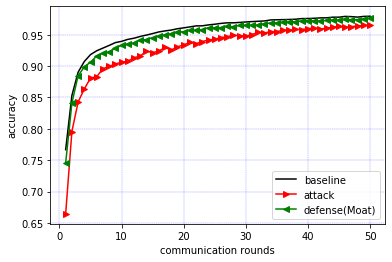

In [14]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], acc_9[0][:50],'r',marker='>',label='attack')
plt.plot(rounds[0][:50], acc_9[1][:50],'g',marker='<',label='defense(Moat)')
plt.xlabel('communication rounds')
plt.ylabel('accuracy')
#plt.title('{}% attacker'.format(30))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_acc_30',dpi=300,bbox_inches='tight')

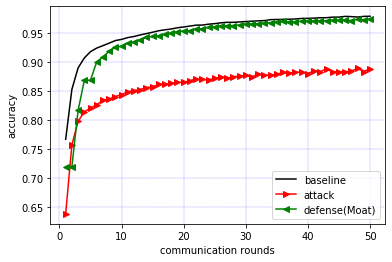

In [15]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], acc_18[0][:50],'r',marker='>',label='attack')
plt.plot(rounds[0][:50], acc_18[1][:50],'g',marker='<',label='defense(Moat)')
plt.xlabel('communication rounds')
plt.ylabel('accuracy')
#plt.title('{}% attacker'.format(60))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_acc_60',dpi=300,bbox_inches='tight')

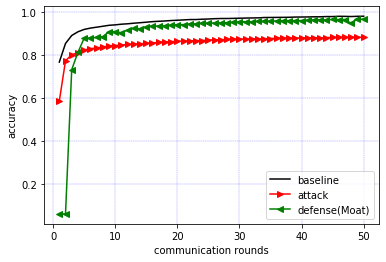

In [16]:
plt.plot(rounds[0][:50], acc_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], acc_27[0][:50],'r',marker='>',label='attack')
plt.plot(rounds[0][:50], acc_27[1][:50],'g',marker='<',label='defense(Moat)')
plt.xlabel('communication rounds')
plt.ylabel('accuracy')
#plt.title('{}% attacker'.format(90))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_acc_90',dpi=300,bbox_inches='tight')

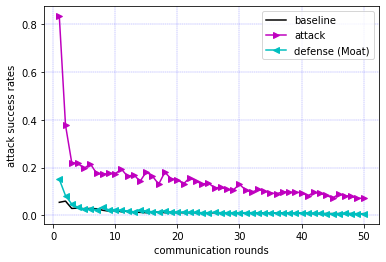

In [17]:
plt.plot(rounds[0][:50], asr_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], asr_9[0][:50],'m',marker='>',label='attack')
plt.plot(rounds[0][:50], asr_9[1][:50],'c',marker='<',label='defense (Moat)')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates')
#plt.title('{}% attacker'.format(30))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_asr_30',dpi=300,bbox_inches='tight')

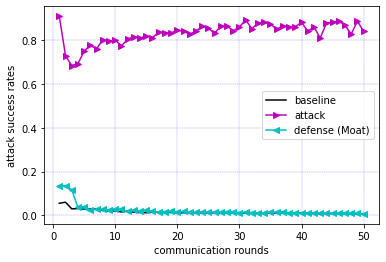

In [18]:
plt.plot(rounds[0][:50], asr_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], asr_18[0][:50],'m',marker='>',label='attack')
plt.plot(rounds[0][:50], asr_18[1][:50],'c',marker='<',label='defense (Moat)')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates')
#plt.title('{}% attacker'.format(60))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_asr_60',dpi=300,bbox_inches='tight')

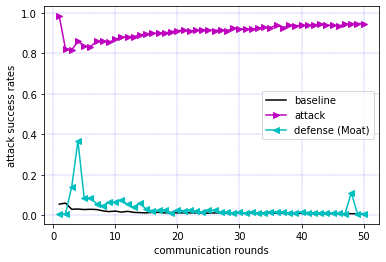

In [19]:
plt.plot(rounds[0][:50], asr_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], asr_27[0][:50],'m',marker='>',label='attack')
plt.plot(rounds[0][:50], asr_27[1][:50],'c',marker='<',label='defense (Moat)')
plt.xlabel('communication rounds')
plt.ylabel('attack success rates')
#plt.title('{}% attacker'.format(90))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_asr_90',dpi=300,bbox_inches='tight')

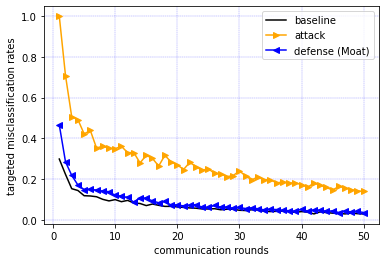

In [20]:
plt.plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], t_mcr_9[0][:50],color='orange',marker='>',label='attack')
plt.plot(rounds[0][:50], t_mcr_9[1][:50],'b',marker='<',label='defense (Moat)')
plt.xlabel('communication rounds')
plt.ylabel('targeted misclassification rates')
#plt.title('{}% attacker'.format(30))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_tmcr_30',dpi=300,bbox_inches='tight')

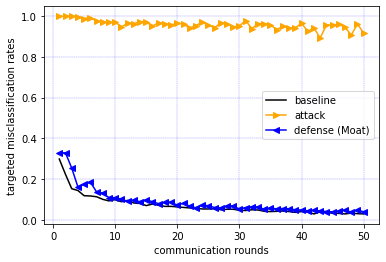

In [21]:
plt.plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], t_mcr_18[0][:50],color='orange',marker='>',label='attack')
plt.plot(rounds[0][:50], t_mcr_18[1][:50],'b',marker='<',label='defense (Moat)')
plt.xlabel('communication rounds')
plt.ylabel('targeted misclassification rates')
#plt.title('{}% attacker'.format(60))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_tmcr_60',dpi=300,bbox_inches='tight')

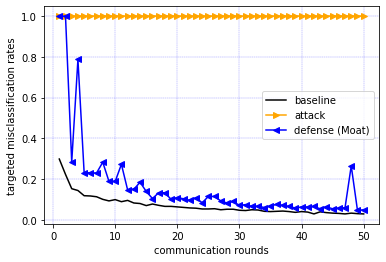

In [22]:
plt.plot(rounds[0][:50], t_mcr_0[0][:50],'k',label='baseline')
plt.plot(rounds[0][:50], t_mcr_27[0][:50],color='orange',marker='>',label='attack')
plt.plot(rounds[0][:50], t_mcr_27[1][:50],'b',marker='<',label='defense (Moat)')
plt.xlabel('communication rounds')
plt.ylabel('targeted misclassification rates')
#plt.title('{}% attacker'.format(90))
plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend()
plt.savefig('grid_mnist_lfa_tmcr_90',dpi=300,bbox_inches='tight')